# PA 3: Association Analysis - Apriori/FP Growth

## Tasks

In [ ]:
%pip install mlxtend --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1.    Load the dataset (from the csv file)

In [ ]:
# Write your code here
df = pd.read_csv("dataset2.csv")
print(df.shape)
df

(14963, 11)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14958,butter milk,whipped/sour cream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14959,bottled water,herbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14960,fruit/vegetable juice,onions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14961,bottled beer,other vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2.    Pre-process the dataset and provide a detailed explanation (such as Handling of null values, empty strings, unncessary trailing characters such as commas and white spaces)

In [ ]:
# Write your code here
df.isnull().sum()
# if 2nd column has null values than there are no items bought
# from below we get that there are no such rows hence no need of null handling

#converting into required format of TransactionEncoder()
trans=[]
for i in range(0,14963):
    trans.append([str(df.values[i,j]) for j in range(0,11)])

trans=np.array(trans)

print(trans.shape)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(14963, 11)


3.    Encode the dataset

In [ ]:
t=TransactionEncoder()
data=t.fit_transform(trans)
data=pd.DataFrame(data,columns=t.columns_,dtype=int)

data.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(14963, 168)

In [ ]:
data.drop('nan',axis=1,inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#now lets check shape
data.shape

#lets verify whether nan is present in columns
'nan' in data.columns
#so its proved that nan is not in columns

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False

In [ ]:
# Write your code here
data

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For each of the combinations in tasks 4 & 5, print the output in the following Sample format:

- Support = 0.02
- Confidence = 0.1
- Total Number of Association Rules: 10
- Top 5 rules ordered by Confidence descending:
- Number of Maximal Sets: 5
- Number of Closed Sets: 5

4.	Execute Apriori algorithm and generate rules for 3 different combinations of support and confidence

In [ ]:
# Write your code here
# Write your code here
combinations = [
    {'support': 0.002, 'confidence': 0.1},
    {'support': 0.005, 'confidence': 0.05},
    {'support': 0.01, 'confidence': 0.07}
]

# Loop over the combinations and generate the rules
for comb in combinations:
  # Run Apriori algorithm
  frequent_itemsets = apriori(data, min_support=comb['support'], use_colnames=True)

# Generate association rules
  rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=comb['confidence'])
# Print the output in the desired format
  print("Support = {}".format(comb['support']))
  print("Confidence = {}".format(comb['confidence']))
  print("Total Number of Association Rules: {}".format(len(rules)))
  print("Top 5 rules ordered by confidence descending:")
  display(rules.sort_values(by=['confidence'], ascending=False).head(5))

#Dictionay storing itemset with same support count key
  fredic = {}
#all unique support count
  su = frequent_itemsets.support.unique()

  for i in range(len(su)):
      inset = list(frequent_itemsets.loc[frequent_itemsets.support ==su[i]]['itemsets'])
      fredic[su[i]] = inset
#Dictionay storing itemset with  support count <= key
  fredic2 = {}
  for i in range(len(su)):
      inset2 = list(frequent_itemsets.loc[frequent_itemsets.support<=su[i]]['itemsets'])
      fredic2[su[i]] = inset2

# Find closed sets
  cl = []
  for index, row in frequent_itemsets.iterrows():
      isclose = True
      cli = row['itemsets']
      cls = row['support']
      checkset = fredic[cls]
      for i in checkset:
          if (cli!=i):
              if(frozenset.issubset(cli,i)):
                  isclose = False
                  break

      if(isclose):
          cl.append(row['itemsets'])

# Find maximal sets
  ml = []
  for index, row in frequent_itemsets.iterrows():
      isclose = True
      cli = row['itemsets']
      cls = row['support']
      checkset = fredic2[cls]
      for i in checkset:
          if (cli!=i):
              if(frozenset.issubset(cli,i)):
                  isclose = False
                  break

      if(isclose):
          ml.append(row['itemsets'])
  print("Number of Maximal Sets: {}".format(len(ml)))
  print("Number of Closed Sets: {}".format(len(cl)))
  print('-'*100)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.002
Confidence = 0.1
Total Number of Association Rules: 61
Top 5 rules ordered by confidence descending:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659,0.014188
6,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
10,(candy),(whole milk),0.014369,0.157923,0.002139,0.148837,0.942468,-0.000131,0.989326,-0.058322
52,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
39,(onions),(whole milk),0.020250,0.157923,0.002941,0.145215,0.919528,-0.000257,0.985133,-0.081999


Number of Maximal Sets: 284
Number of Closed Sets: 330
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.005
Confidence = 0.05
Total Number of Association Rules: 57
Top 5 rules ordered by confidence descending:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
40,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
8,(newspapers),(whole milk),0.038896,0.157923,0.005614,0.144330,0.913926,-0.000529,0.984114,-0.089246
5,(domestic eggs),(whole milk),0.037091,0.157923,0.005280,0.142342,0.901341,-0.000578,0.981834,-0.102072
7,(frankfurter),(whole milk),0.037760,0.157923,0.005280,0.139823,0.885388,-0.000683,0.978958,-0.118576


Number of Maximal Sets: 107
Number of Closed Sets: 126
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.01
Confidence = 0.07
Total Number of Association Rules: 10
Top 5 rules ordered by confidence descending:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
3,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
7,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
0,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091


Number of Maximal Sets: 64
Number of Closed Sets: 69
----------------------------------------------------------------------------------------------------


5.    Execute FP Growth algorithm and generate rules for 3 different combinations of support and confidence

In [ ]:
# Write your code here
combinations = [
    {'support': 0.002, 'confidence': 0.1},
    {'support': 0.005, 'confidence': 0.05},
    {'support': 0.01, 'confidence': 0.07}
]

# Loop over the combinations and generate the rules
for comb in combinations:
  # Run Apriori algorithm
  frequent_itemsets_fp = fpgrowth(data, min_support=comb['support'], use_colnames = True)

# Generate association rules
  rules = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=comb['confidence'])
# Print the output in the desired format
  print("Support = {}".format(comb['support']))
  print("Confidence = {}".format(comb['confidence']))
  print("Total Number of Association Rules: {}".format(len(rules)))
  print("Top 5 rules ordered by confidence descending:")
  display(rules.sort_values(by=['confidence'], ascending=False).head(5))

#Dictionay storing itemset with same support count key
  frequent_dict_fp = {}
#all unique support count
  support_count_fp = frequent_itemsets_fp.support.unique()

  for i in range(len(support_count_fp)):
      inset = list(frequent_itemsets_fp.loc[frequent_itemsets_fp.support ==support_count_fp[i]]['itemsets'])
      frequent_dict_fp[support_count_fp[i]] = inset
#Dictionay storing itemset with  support count <= key
  frequent_dict_fp2 = {}
  for i in range(len(support_count_fp)):
      inset2 = list(frequent_itemsets_fp.loc[frequent_itemsets_fp.support<=support_count_fp[i]]['itemsets'])
      frequent_dict_fp2[support_count_fp[i]] = inset2

# Find closed sets
  cl_fp = []
  for index, row in frequent_itemsets_fp.iterrows():
      isclose = True
      cli = row['itemsets']
      cls = row['support']
      checkset = frequent_dict_fp[cls]
      for i in checkset:
          if (cli!=i):
              if(frozenset.issubset(cli,i)):
                  isclose = False
                  break

      if(isclose):
          cl_fp.append(row['itemsets'])

# Find maximal sets
  ml_fp = []
  for index, row in frequent_itemsets_fp.iterrows():
      isclose = True
      cli = row['itemsets']
      cls = row['support']
      checkset = frequent_dict_fp2[cls]
      for i in checkset:
          if (cli!=i):
              if(frozenset.issubset(cli,i)):
                  isclose = False
                  break

      if(isclose):
          ml_fp.append(row['itemsets'])
  print("Number of Maximal Sets: {}".format(len(ml_fp)))
  print("Number of Closed Sets: {}".format(len(cl_fp)))
  print('-'*100)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.002
Confidence = 0.1
Total Number of Association Rules: 61
Top 5 rules ordered by confidence descending:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
57,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659,0.014188
32,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
45,(candy),(whole milk),0.014369,0.157923,0.002139,0.148837,0.942468,-0.000131,0.989326,-0.058322
3,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
47,(onions),(whole milk),0.020250,0.157923,0.002941,0.145215,0.919528,-0.000257,0.985133,-0.081999


Number of Maximal Sets: 284
Number of Closed Sets: 330
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.005
Confidence = 0.05
Total Number of Association Rules: 57
Top 5 rules ordered by confidence descending:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
52,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
9,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
54,(newspapers),(whole milk),0.038896,0.157923,0.005614,0.144330,0.913926,-0.000529,0.984114,-0.089246
53,(domestic eggs),(whole milk),0.037091,0.157923,0.005280,0.142342,0.901341,-0.000578,0.981834,-0.102072
28,(frankfurter),(whole milk),0.037760,0.157923,0.005280,0.139823,0.885388,-0.000683,0.978958,-0.118576


Number of Maximal Sets: 107
Number of Closed Sets: 126
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.01
Confidence = 0.07
Total Number of Association Rules: 10
Top 5 rules ordered by confidence descending:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
9,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
3,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
6,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091


Number of Maximal Sets: 64
Number of Closed Sets: 69
----------------------------------------------------------------------------------------------------


6.	Plot the following graphs comparing both the algorithms:
    - time vs minimum support
    - time vs number of itemsets

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110

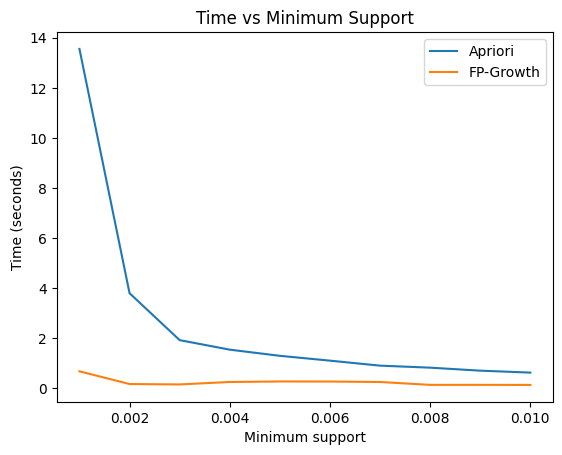

/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse co

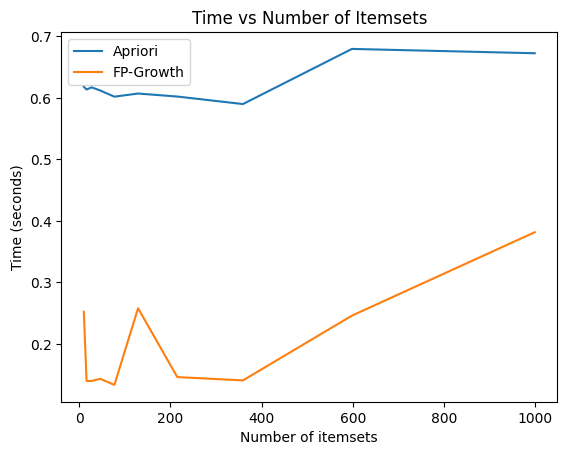

In [ ]:
# Write your code here
# time vs minimum support
min_supports = np.linspace(0.001, 0.01, 10)
apriori_times = []
fpgrowth_times = []
for min_support in min_supports:
  start_time = time.time()
  apriori(data, min_support=min_support)
  apriori_times.append(time.time() - start_time)
  start_time = time.time()
  fpgrowth(data, min_support=min_support)
  fpgrowth_times.append(time.time() - start_time)
plt.plot(min_supports, apriori_times, label='Apriori')
plt.plot(min_supports, fpgrowth_times, label='FP-Growth')
plt.xlabel('Minimum support')
plt.ylabel('Time (seconds)')
plt.title('Time vs Minimum Support')
plt.legend()
plt.show()

# time vs number of itemsets
num_itemsets = np.logspace(1, np.log10(999), 10, dtype=int)
apriori_times = []
fpgrowth_times = []
for n in num_itemsets:
  start_time = time.time()
  apriori(data, min_support=0.01)
  apriori_times.append(time.time() - start_time)
  start_time = time.time()
  fpgrowth(data, min_support=0.01)
  fpgrowth_times.append(time.time() - start_time)
plt.plot(num_itemsets, apriori_times, label='Apriori')
plt.plot(num_itemsets, fpgrowth_times, label='FP-Growth')
plt.xlabel('Number of itemsets')
plt.ylabel('Time (seconds)')
plt.title('Time vs Number of Itemsets')
plt.legend()
plt.show()

7.    Explain the insights that you got from the graphs. Which algorithm worked better and what do you believe is the reason?


### FP- Growth is quicker than Apriori . As the minimal support decreases, the speed disparity decreases incase of Apriori but for FP-Growth it some what remains constant with varying minimum support


### When the number of itemsets rises, there might be a possibility that both works at same pace else for lesser number of itemsets we can see that FP-Growth requires less time than Apriori. With increase in number of itemsets FP growth expands linearly with respect to time, where as Apriori becomes constant.

Hence we conclude that FP- Growth worked best for the above dataset.
Reasons :

Main Reason :Low minimum supports

In some circumstances, the frequent pattern mining method FP-growth may outperform Apriori. The following justifies why FP-growth may be more effective than Apriori:

1. Dense Datasets: Datasets containing dense data, where the number of items is significantly more than the number of transactions, are better suitable for FP-growth. This is so that FP-growth may effectively mine frequent itemsets by creating a compressed representation of the dataset called the FP-tree. Contrarily, Apriori produces a lot of candidate itemsets, which might be expensive to compute for dense data.

2. Large itemsets: FP-growth may be more effective than Apriori when the dataset contains a lot of large itemsets. Due to the fact that Apriori must create candidate itemsets of increasing size, which can be computationally expensive for large itemsets, FP-growth generates an FP-tree that can be used to efficiently mine frequent itemsets of any size.

3. Low minimum support: FP-growth can be more effective than Apriori when the minimum support threshold is low, which means the required frequent itemets are relatively rare. This is so that the FP-tree can be constructed using FP-growth rather than Apriori, which may require numerous scans of the dataset to produce candidate itemsets.

In general, the properties of the dataset and the specific mining task at hand determine which mining method should be used—Apriori or FP-growth. While FP-growth may be more effective in some circumstances, Apriori may perform better in others.










# REFERENCES
https://towardsdatascience.com/how-to-find-closed-and-maximal-frequent-itemsets-from-fp-growth-861a1ef13e21